<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/03.02-Solving-ODEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook shows how to use functions from `sympy`to solve ODEs using Laplace transforms.

It was inspired by this [post](https://mathcube.online/blog/laplace-transforms-in-python-for-ode-solving/) and this [notebook](https://calclab.math.tamu.edu/Python/m308/6_2Solutions.pdf).

In [24]:
from sympy import *

t, s = symbols('t, s')
y = Function('y')

# The unevaluated Laplace transform:
Y = laplace_transform(y(t), t, s)

Let us start with this first example.

$\frac{d^2y(t)}{dt^2} + y(t) = 6y(t)$ with the initial conditions $y(0) = 1$ and $\frac{dy(0)}{dt} = 2$

In [83]:
deq = Eq(Derivative(y(t), (t, 2)) + Derivative(y(t), t), 6*y(t))
ics = {y(0):1,
       Derivative(y(t),t).subs(t,0):2
       }
deq

Eq(Derivative(y(t), t) + Derivative(y(t), (t, 2)), 6*y(t))

In [84]:
ysoln = dsolve(deq, ics=ics)
print('Solution to the IVP is', ysoln)

Solution to the IVP is Eq(y(t), exp(2*t))


In [85]:
L_eq = Eq(
    laplace_transform(deq.lhs, t, s)[0].subs(ics),
    laplace_transform(deq.rhs, t, s, noconds=True)
)
L_eq

Eq(s**2*LaplaceTransform(y(t), t, s) + s*LaplaceTransform(y(t), t, s) - s - 3, 6*LaplaceTransform(y(t), t, s))

In [86]:
Y_s = solve(L_eq, Y)[0][0]
Y_s

1/(s - 2)

In [87]:
y_t = inverse_laplace_transform(Y_s, s, t)
y_t

exp(2*t)*Heaviside(t)

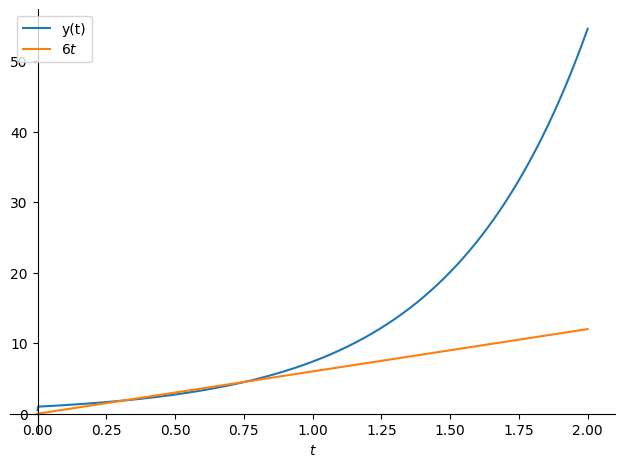

In [89]:
p1 = plot(y_t, (t, 0, 2),
          show=False, label='y(t)', legend=True, ylabel='')
p2 = plot(6*t, (t, 0, 2), show=False, label=r'$6t$')
p1.append(p2[0])
p1.show()

Now, let us solve this second example.

$\frac{d^2y(t)}{dt^2} + y(t) = \sin(2t)$ with the initial conditions $y(0) = 2$ and $\frac{dy(0)}{dt} = 1$

In [90]:
deq = Eq(Derivative(y(t), (t, 2)) + y(t), sin(2*t))
ics = {y(0):2,
       Derivative(y(t),t).subs(t,0):1
       }
deq

Eq(y(t) + Derivative(y(t), (t, 2)), sin(2*t))

In [91]:
ysoln = dsolve(deq, ics=ics)
print('Solution to the IVP is', ysoln)

Solution to the IVP is Eq(y(t), 5*sin(t)/3 - sin(2*t)/3 + 2*cos(t))


In [92]:
L_eq = Eq(
    laplace_transform(deq.lhs, t, s)[0].subs(ics),
    laplace_transform(deq.rhs, t, s, noconds=True)
)
L_eq

Eq(s**2*LaplaceTransform(y(t), t, s) - 2*s + LaplaceTransform(y(t), t, s) - 1, 2/(s**2 + 4))

In [93]:
Y_s = solve(L_eq, Y)[0][0]
Y_s

(2*s**3 + s**2 + 8*s + 6)/(s**4 + 5*s**2 + 4)

In [94]:
y_t = inverse_laplace_transform(Y_s, s, t)
y_t = collect(y_t, Heaviside(t))
y_t

(5*sin(t)/3 - sin(2*t)/3 + 2*cos(t))*Heaviside(t)

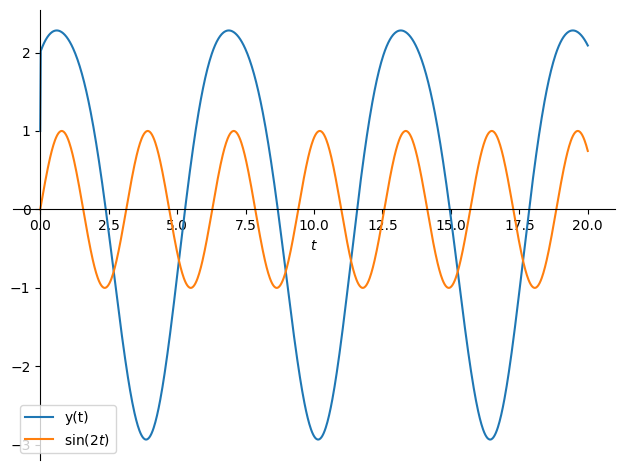

In [97]:
p1 = plot(y_t, (t, 0, 20),
          show=False, label='y(t)', legend=True, ylabel='')
p2 = plot(sin(2*t), (t, 0, 20), show=False, label=r'$\sin(2t)$')
p1.append(p2[0])
p1.show()

Now, let us solve this third example.

$\frac{d^2y(t)}{dt^2} + 2y(t) + y(t) = 4e^{-t}$ with the initial conditions $y(0) = 2$ and $\frac{dy(0)}{dt} = 1$

In [98]:
deq = Eq(Derivative(y(t), (t, 2)) + 2*Derivative(y(t), (t, 1)) + y(t), 4*exp(-t))
ics = {y(0):2,
       Derivative(y(t),t).subs(t,0):-1
       }
deq

Eq(y(t) + 2*Derivative(y(t), t) + Derivative(y(t), (t, 2)), 4*exp(-t))

In [99]:
ysoln = dsolve(deq, ics=ics)
print('Solution to the IVP is', ysoln)

Solution to the IVP is Eq(y(t), (t*(2*t + 1) + 2)*exp(-t))


In [100]:
L_eq = Eq(
    laplace_transform(deq.lhs, t, s)[0].subs(ics),
    laplace_transform(deq.rhs, t, s, noconds=True)
)
L_eq

Eq(s**2*LaplaceTransform(y(t), t, s) + 2*s*LaplaceTransform(y(t), t, s) - 2*s + LaplaceTransform(y(t), t, s) - 3, 4/(s + 1))

In [101]:
Y_s = solve(L_eq, Y)[0][0]
Y_s

(2*s**2 + 5*s + 7)/(s**3 + 3*s**2 + 3*s + 1)

In [102]:
y_t = inverse_laplace_transform(Y_s, s, t)
y_t = collect(y_t, Heaviside(t))
y_t

(2*t**2*exp(-t) + t*exp(-t) + 2*exp(-t))*Heaviside(t)

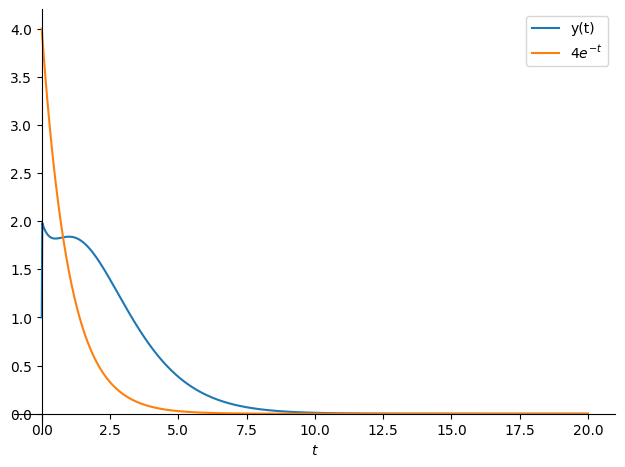

In [106]:
p1 = plot(y_t, (t, 0, 20),
          show=False, label='y(t)', legend=True, ylabel='')
p2 = plot(4*exp(-t), (t, 0, 20), show=False, label=r'$4e^{-t}$')
p1.append(p2[0])
p1.show()